In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 22 15:52:06 2017

@author: Manikanda Krishnan V (06-02-02-10-22-17-1-14787)
"""

import numpy as np
from skimage import io,color,transform
from  skimage.util import random_noise
import matplotlib.pyplot as plt
# The intensity range belongs to [0,1]
dynamic_range = 1.0
#The image is loaded resized into 256x256 for processing speed and is displayed
image_path = r"C:\Users\Sephiroth\Downloads\iisc\courses\DIP\assignment 1\lena.jpg"
dim = 256
im = transform.resize(color.rgb2gray(io.imread(image_path)),(dim,dim))
io.imshow(im)
plt.show()


Halftoning is a technique to discretize the image into black and white for printing purposes. The quality of the halftone depends on the type of screen used. There are various types of screens - clustered dot,dispersive dot etc.
In this implementation I will be using a dispersive dot technique using bayer's screen of size 4x4(https://en.wikipedia.org/wiki/Ordered_dithering). The halftone screen is then tiled to result in a screen the same size as image. This new screen is then added onto the image and is then thresholded into 0/1.
For further reference : https://www.youtube.com/watch?v=UJtV3DdjCVY

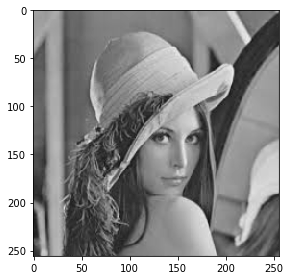

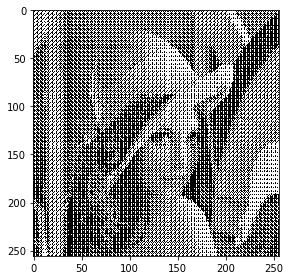

In [68]:
grid_size = 4
#bayer filter
halftone_tile = np.array([x*1.0/(grid_size**2 -1) for x in [0,8,2,10,12,4,14,6,3,11,15,9,1,7,13,5]]).reshape((grid_size,grid_size))
#The screen is then generated by tiling the tile.
halftone_screen = np.tile(halftone_tile,(dim/grid_size,dim/grid_size))
# The screen is added to the image
im1 = im + halftone_screen
im_halftone = np.zeros((dim,dim))
#The resulting image is then converted to black and white and is then displayed
im_halftone[im1 > dynamic_range]= 1
io.imshow(im_halftone)
plt.show()

The final result is much better in terms of visual appearance than what we had achieved using 1bit dithering and quantization(previous questions).